# Project 1: Trading with Momentum
## Instructions
Each problem consists of a function to implement and instructions on how to implement the function.  The parts of the function that need to be implemented are marked with a `# TODO` comment. After implementing the function, run the cell to test it against the unit tests we've provided. For each problem, we provide one or more unit tests from our `project_tests` package. These unit tests won't tell you if your answer is correct, but will warn you of any major errors. Your code will be checked for the correct solution when you submit it to Udacity.

## Packages
When you implement the functions, you'll only need to you use the packages you've used in the classroom, like [Pandas](https://pandas.pydata.org/) and [Numpy](http://www.numpy.org/). These packages will be imported for you. We recommend you don't add any import statements, otherwise the grader might not be able to run your code.

The other packages that we're importing are `helper`, `project_helper`, and `project_tests`. These are custom packages built to help you solve the problems.  The `helper` and `project_helper` module contains utility functions and graph functions. The `project_tests` contains the unit tests for all the problems.

### Install Packages

In [1]:
import sys

### Load Packages

In [2]:
import pandas as pd
import numpy as np
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
import matplotlib.pyplot as plt
%matplotlib inline

## Market Data
### Load Data
The data we use for most of the projects is end of day data. This contains data for many stocks, but we'll be looking at stocks in the S&P 500. We also made things a little easier to run by narrowing down our range of time period instead of using all of the data.

In [3]:
close = pd.read_csv('close.csv', index_col = 'Date', parse_dates = True)

ticker = close.columns
close.tail()

,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEP,...,VRTX,VZ,WBA,WFC,WM,WMB,WMT,XOM,XRX,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-23,143.537506,69.546913,47.894245,120.499290,145.410004,79.884262,39.632420,99.272202,107.750000,68.452911,...,133.500000,42.733852,74.155777,50.649113,71.847443,27.456055,72.661385,77.678070,27.229874,62.397488
2017-06-26,143.086136,69.642654,47.728348,120.106598,144.960007,78.924271,39.767220,100.055321,106.120003,68.759056,...,133.410004,43.072792,75.311729,51.083656,71.876801,27.666149,73.302162,77.325890,27.947964,62.337852
2017-06-27,141.035309,69.307564,47.494148,119.959343,142.539993,76.543907,39.478359,99.360291,102.919998,67.658844,...,129.229996,42.216042,75.049454,51.334732,71.534348,27.857149,73.797318,77.202164,27.746895,62.377609
2017-06-28,143.095947,69.814995,47.308739,121.481041,143.809998,77.582260,39.613159,100.515411,104.279999,67.113518,...,131.110001,42.216042,74.884323,52.464561,71.935501,28.411045,74.282768,77.601929,28.287737,62.566452
2017-06-29,140.986252,69.393730,47.552700,120.744736,141.240005,76.152069,39.122086,99.321129,101.389999,66.587318,...,127.239998,41.811207,76.127708,53.864773,71.446281,28.458794,73.719650,76.811905,28.123552,62.119194


In [4]:
close.shape

(1257, 218)

### Stock Example
Let's see what a single stock looks like from the closing prices. For this example and future display examples in this project, we'll use Apple's stock (AAPL). If we tried to graph all the stocks, it would be too much information.

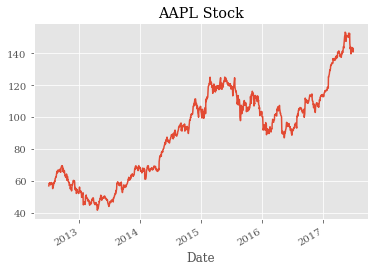

In [5]:
close['AAPL'].plot(title = 'AAPL Stock', grid = True)

## Resample Adjusted Prices

The trading signal you'll develop in this project does not need to be based on daily prices, for instance, you can use month-end prices to perform trading once a month. To do this, you must first resample the daily adjusted closing prices into monthly buckets, and select the last observation of each month.

Implement the `resample_prices` to resample `close_prices` at the sampling frequency of `freq`.

In [6]:
close.index

DatetimeIndex(['2012-07-02', '2012-07-03', '2012-07-05', '2012-07-06',
               '2012-07-09', '2012-07-10', '2012-07-11', '2012-07-12',
               '2012-07-13', '2012-07-16',
               ...
               '2017-06-16', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-26', '2017-06-27',
               '2017-06-28', '2017-06-29'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

In [7]:
index = pd.date_range('1/1/2000', periods=366, freq='D')
series = pd.Series(np.random.randn(366), index=index)

series.resample('M').ohlc()

,open,high,low,close
2000-01-31,-1.000214,2.536688,-2.380085,2.536688
2000-02-29,0.636658,1.569024,-1.833922,-0.230225
2000-03-31,-0.310188,0.931904,-1.712878,0.892529
2000-04-30,-0.971258,2.329536,-2.585634,0.708465
2000-05-31,1.042860,1.864856,-1.395635,1.039517
2000-06-30,0.173078,1.184864,-1.924364,0.087553
2000-07-31,1.140127,1.889171,-2.101265,0.253551
2000-08-31,0.669600,2.293601,-1.461494,-1.082529
2000-09-30,1.158619,2.807006,-1.345541,-1.345541
2000-10-31,-0.739417,1.903122,-1.440328,-0.403378


In [8]:
def resample_prices(close_prices, freq='M'):
    """
    Resample close prices for each ticker at specified frequency.
    
    Parameters
    ----------
    close_prices : DataFrame
        Close prices for each ticker and date
    freq : str
        What frequency to sample at
        For valid freq choices, see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
    
    Returns
    -------
    prices_resampled : DataFrame
        Resampled prices for each ticker and date
    """
    # TODO: Implement Function
    prices_resampled = close_prices.resample('M').last()
    return prices_resampled

In [9]:
resample_prices(close).head()

,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEP,...,VRTX,VZ,WBA,WFC,WM,WMB,WMT,XOM,XRX,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-07-31,58.632900,NaN,27.758831,52.322685,30.879999,33.323139,22.133869,42.636353,33.919998,33.310715,...,48.509998,34.370857,31.697624,28.346937,28.744476,23.315277,63.456005,70.827774,15.473968,NaN
2012-08-31,65.833115,NaN,27.436495,53.450710,31.270000,34.144917,22.847982,43.789913,31.049999,34.284927,...,53.330002,32.695721,31.416485,28.717428,28.894878,23.898678,62.230122,71.657455,16.456444,NaN
2012-09-30,66.017181,NaN,28.700733,60.765480,32.439999,33.663773,23.215263,44.567982,33.349998,35.042553,...,55.889999,34.698280,32.013885,29.139366,27.082489,25.898258,63.258739,75.063850,16.486301,NaN
2012-10-31,58.913731,NaN,27.840275,59.172901,34.029999,33.612213,22.924856,43.906990,31.850000,35.441311,...,48.279999,34.364624,30.950859,28.430502,27.639669,25.913069,64.304482,74.834015,14.464818,NaN
2012-11-30,59.824135,NaN,27.627752,59.620590,34.610001,34.883842,22.964376,43.109234,33.130001,34.386852,...,39.790001,33.964325,30.034555,28.036377,27.801140,24.320812,61.732967,72.799873,15.295875,NaN


### View Data
Let's apply this function to `close` and view the results.

In [10]:
apple_ticker = "AAPL"

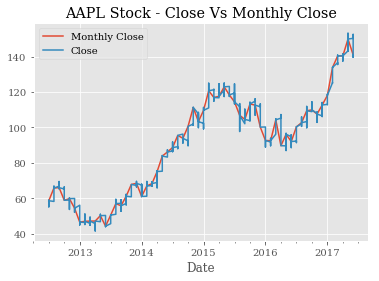

In [11]:
monthly_close = resample_prices(close)
monthly_close.loc[:, apple_ticker].plot(label = 'Monthly Close')
close.loc[:, apple_ticker].plot(label = 'Close')
plt.title('{} Stock - Close Vs Monthly Close'.format(apple_ticker))
plt.legend(loc = 0)

## Compute Log Returns

Compute log returns ($R_t$) from prices ($P_t$) as your primary momentum indicator:

$$R_t = log_e(P_t) - log_e(P_{t-1})$$

Implement the `compute_log_returns` function below, such that it accepts a dataframe (like one returned by `resample_prices`), and produces a similar dataframe of log returns. Use Numpy's [log function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html) to help you calculate the log returns.

In [12]:
def compute_log_returns(prices):
    """
    Compute log returns for each ticker.
    
    Parameters
    ----------
    prices : DataFrame
        Prices for each ticker and date
    
    Returns
    -------
    log_returns : DataFrame
        Log returns for each ticker and date
    """
    # TODO: Implement Function
    log_returns = np.log(prices/prices.shift(1))
    return log_returns

### View Data
Using the same data returned from `resample_prices`, we'll generate the log returns.

Text(0.5,1,'Log Returns of AAPL Stock (Monthly)')

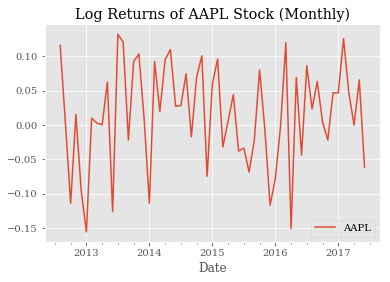

In [13]:
monthly_close_returns = compute_log_returns(monthly_close)
monthly_close_returns[[apple_ticker]].plot()
plt.title("Log Returns of {} Stock (Monthly)".format(apple_ticker))

## Shift Returns
Implement the `shift_returns` function to shift the log returns to the previous or future returns in the time series. For example, the parameter `shift_n` is 2 and `returns` is the following:

```
                           Returns
               A         B         C         D
2013-07-08     0.015     0.082     0.096     0.020     ...
2013-07-09     0.037     0.095     0.027     0.063     ...
2013-07-10     0.094     0.001     0.093     0.019     ...
2013-07-11     0.092     0.057     0.069     0.087     ...
...            ...       ...       ...       ...
```

the output of the `shift_returns` function would be:
```
                        Shift Returns
               A         B         C         D
2013-07-08     NaN       NaN       NaN       NaN       ...
2013-07-09     NaN       NaN       NaN       NaN       ...
2013-07-10     0.015     0.082     0.096     0.020     ...
2013-07-11     0.037     0.095     0.027     0.063     ...
...            ...       ...       ...       ...
```
Using the same `returns` data as above, the `shift_returns` function should generate the following with `shift_n` as -2:
```
                        Shift Returns
               A         B         C         D
2013-07-08     0.094     0.001     0.093     0.019     ...
2013-07-09     0.092     0.057     0.069     0.087     ...
...            ...       ...       ...       ...       ...
...            ...       ...       ...       ...       ...
...            NaN       NaN       NaN       NaN       ...
...            NaN       NaN       NaN       NaN       ...
```
_Note: The "..." represents data points we're not showing._

In [14]:
def shift_returns(returns, shift_n):
    """
    Generate shifted returns
    
    Parameters
    ----------
    returns : DataFrame
        Returns for each ticker and date
    shift_n : int
        Number of periods to move, can be positive or negative
    
    Returns
    -------
    shifted_returns : DataFrame
        Shifted returns for each ticker and date
    """
    # TODO: Implement Function
    shifted_returns = returns.shift(shift_n)
    return shifted_returns

### View Data
Let's get the previous month's and next month's returns.

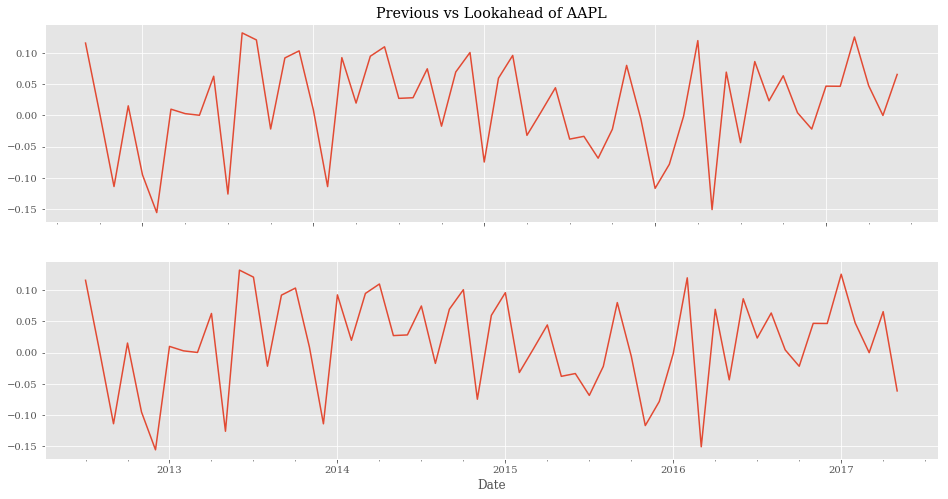

In [15]:
prev_returns = shift_returns(monthly_close_returns, 1)
lookahead_returns = shift_returns(monthly_close_returns, -1)

plt.figure(figsize = (16,8))
ax = plt.subplot(211)
prev_returns.loc[:, apple_ticker].plot(label = 'Previous', sharex = ax)
plt.title('Previous vs Lookahead of {}'.format(apple_ticker))

plt.subplot(212)
lookahead_returns.loc[:, apple_ticker].plot(label = 'Lookahead', sharex = ax)

## Generate Trading Signal

A trading signal is a sequence of trading actions, or results that can be used to take trading actions. A common form is to produce a "long" and "short" portfolio of stocks on each date (e.g. end of each month, or whatever frequency you desire to trade at). This signal can be interpreted as rebalancing your portfolio on each of those dates, entering long ("buy") and short ("sell") positions as indicated.

Here's a strategy that we will try:
> For each month-end observation period, rank the stocks by _previous_ returns, from the highest to the lowest. Select the top performing stocks for the long portfolio, and the bottom performing stocks for the short portfolio.

Implement the `get_top_n` function to get the top performing stock for each month. Get the top performing stocks from `prev_returns` by assigning them a value of 1. For all other stocks, give them a value of 0. For example, using the following `prev_returns`:

```
                                     Previous Returns
               A         B         C         D         E         F         G
2013-07-08     0.015     0.082     0.096     0.020     0.075     0.043     0.074
2013-07-09     0.037     0.095     0.027     0.063     0.024     0.086     0.025
...            ...       ...       ...       ...       ...       ...       ...
```

The function `get_top_n` with `top_n` set to 3 should return the following:
```
                                     Previous Returns
               A         B         C         D         E         F         G
2013-07-08     0         1         1         0         1         0         0
2013-07-09     0         1         0         1         0         1         0
...            ...       ...       ...       ...       ...       ...       ...
```
*Note: You may have to use Panda's [`DataFrame.iterrows`](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.iterrows.html) with [`Series.nlargest`](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.Series.nlargest.html) in order to implement the function. This is one of those cases where creating a vecorization solution is too difficult.*

In [16]:
prev_returns.iloc[2,:].nlargest(3)

EA      0.190305
CSCO    0.179182
IPGP    0.170905
Name: 2012-09-30 00:00:00, dtype: float64

In [17]:
def get_top_n(prev_returns, top_n):
    """
    Select the top performing stocks
    
    Parameters
    ----------
    prev_returns : DataFrame
        Previous shifted returns for each ticker and date
    top_n : int
        The number of top performing stocks to get
    
    Returns
    -------
    top_stocks : DataFrame
        Top stocks for each ticker and date marked with a 1
    """
    # TODO: Implement Function
    top_stocks = prev_returns.copy()
    
    for index, row in prev_returns.iterrows():
        tf_vector = np.where(row >= np.min(row.nlargest(top_n)),1,0)
        top_stocks.loc[index, :] = tf_vector
        
    return top_stocks.astype(int)

In [18]:
top_stocks = prev_returns.copy()

In [19]:
for index, row in prev_returns.iterrows():
    print(row.nlargest(2))
    print(type(row.nlargest(2)))
    print('-------------')
    #tf_vector = np.array(row >= row.nlargest(3)[-1]) * 1
    #top_stocks.loc[index, :] = tf_vector

Series([], Name: 2012-07-31 00:00:00, dtype: float64)
<class 'pandas.core.series.Series'>
-------------
Series([], Name: 2012-08-31 00:00:00, dtype: float64)
<class 'pandas.core.series.Series'>
-------------
EA      0.190305
CSCO    0.179182
Name: 2012-09-30 00:00:00, dtype: float64
<class 'pandas.core.series.Series'>
-------------
FB     0.181768
HCA    0.152398
Name: 2012-10-31 00:00:00, dtype: float64
<class 'pandas.core.series.Series'>
-------------
NFLX    0.375382
C       0.133417
Name: 2012-11-30 00:00:00, dtype: float64
<class 'pandas.core.series.Series'>
-------------
FB      0.282458
TRIP    0.231756
Name: 2012-12-31 00:00:00, dtype: float64
<class 'pandas.core.series.Series'>
-------------
DAL    0.171429
BAC    0.164390
Name: 2013-01-31 00:00:00, dtype: float64
<class 'pandas.core.series.Series'>
-------------
NFLX    0.579218
BSX     0.265179
Name: 2013-02-28 00:00:00, dtype: float64
<class 'pandas.core.series.Series'>
-------------
STZ     0.312706
ATVI    0.226646
Name: 

In [20]:
get_top_n(prev_returns,1)

,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEP,...,VRTX,VZ,WBA,WFC,WM,WMB,WMT,XOM,XRX,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-07-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-08-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-09-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-02-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-03-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
A = pd.DataFrame(np.random.uniform(size = 100**2).reshape(100,100))
A.iloc[0, :] = np.nan
A.iloc[0:2, 1] = np.nan
A_copy = A.copy()
print(A)
for index, row in A.iterrows():
    print(index)
    print(row)
    print(row.nlargest(10))
    print(np.where(row >= np.min(row.nlargest(10)),1,0))
    print("----------------------")

          0         1         2         3         4         5         6   \
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1   0.104026       NaN  0.145761  0.004661  0.481978  0.459459  0.363793   
2   0.526072  0.273032  0.969765  0.210078  0.741233  0.084628  0.972586   
3   0.680869  0.232541  0.296820  0.749687  0.716154  0.471901  0.377290   
4   0.999137  0.494658  0.640720  0.150029  0.057743  0.604377  0.705845   
5   0.673477  0.986543  0.844576  0.017822  0.010696  0.631101  0.021992   
6   0.831094  0.841956  0.090010  0.822551  0.917890  0.003459  0.459079   
7   0.533720  0.494076  0.433416  0.350406  0.303333  0.710025  0.938079   
8   0.465008  0.289972  0.603824  0.473596  0.480547  0.031612  0.658242   
9   0.425978  0.111738  0.535493  0.855400  0.528119  0.042580  0.401915   
10  0.090603  0.857040  0.208393  0.813201  0.269279  0.634037  0.674042   
11  0.907434  0.693962  0.974320  0.966036  0.890651  0.760214  0.784653   
12  0.577574

In [22]:
np.sort(get_top_n(A, 10).sum())

array([ 4,  5,  5,  5,  5,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 17, 17],
      dtype=int64)

### View Data
We want to get the best performing and worst performing stocks. To get the best performing stocks, we'll use the `get_top_n` function. To get the worst performing stocks, we'll also use the `get_top_n` function. However, we pass in `-1*prev_returns` instead of just `prev_returns`. Multiplying by negative one will flip all the positive returns to negative and negative returns to positive. Thus, it will return the worst performing stocks.

In [23]:
top_bottom_n = 50
df_long = get_top_n(prev_returns, top_bottom_n)
df_short = get_top_n(-1*prev_returns, top_bottom_n)
########################## project helper ???

## Projected Returns
It's now time to check if your trading signal has the potential to become profitable!

We'll start by computing the net returns this portfolio would return. For simplicity, we'll assume every stock gets an equal dollar amount of investment. This makes it easier to compute a portfolio's returns as the simple arithmetic average of the individual stock returns.

Implement the `portfolio_returns` function to compute the expected portfolio returns. Using `df_long` to indicate which stocks to long and `df_short` to indicate which stocks to short, calculate the returns using `lookahead_returns`. To help with calculation, we've provided you with `n_stocks` as the number of stocks we're investing in a single period.

In [24]:
def portfolio_returns(df_long, df_short, lookahead_returns, n_stocks):
    """
    Compute expected returns for the portfolio, assuming equal investment in each long/short stock.
    
    Parameters
    ----------
    df_long : DataFrame
        Top stocks for each ticker and date marked with a 1
    df_short : DataFrame
        Bottom stocks for each ticker and date marked with a 1
    lookahead_returns : DataFrame
        Lookahead returns for each ticker and date
    n_stocks: int
        The number number of stocks chosen for each month
    
    Returns
    -------
    portfolio_returns : DataFrame
        Expected portfolio returns for each ticker and date
    """
    # TODO: Implement Function
    portfolio_returns = (df_long * lookahead_returns - df_short * lookahead_returns) / n_stocks
    
    return portfolio_returns

In [25]:
expected_portfolio_returns = portfolio_returns(df_long, df_short, lookahead_returns, 2*top_bottom_n)

In [26]:
expected_portfolio_returns

,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEP,...,VRTX,VZ,WBA,WFC,WM,WMB,WMT,XOM,XRX,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-07-31,0.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2012-08-31,0.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2012-09-30,-1.138408e-03,NaN,0.000304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000460,0.000000,...,-0.001464,0.000097,0.000338,0.000000,0.000000,0.000000,-0.000164,0.000000,0.000000,NaN
2012-10-31,0.000000e+00,NaN,0.000000,0.000075,0.000000,-0.000371,0.000000,0.000000,0.000394,0.000000,...,0.000000,-0.000117,0.000000,0.000000,-0.000058,-0.000634,0.000000,0.000000,0.000000,NaN
2012-11-30,9.512740e-04,NaN,0.000000,0.000000,0.000850,0.000000,0.000000,0.000000,-0.000649,0.000000,...,-0.000517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000077,NaN
2012-12-31,0.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000594,...,-0.000665,0.000000,-0.000767,0.000000,0.000000,-0.000682,-0.000249,-0.000388,0.001608,NaN
2013-01-31,-9.983163e-05,0.000000,0.000000,-0.000338,0.000384,0.000000,0.000000,0.000000,-0.000572,0.000000,...,0.000445,-0.000648,0.000308,0.000000,0.000000,0.000000,-0.000118,-0.000017,0.000000,NaN
2013-02-28,-2.850341e-05,0.000000,0.000000,0.000000,-0.001017,0.000000,0.000000,0.000000,0.001163,0.000000,...,0.000000,-0.000548,0.000000,-0.000530,0.000000,0.000000,-0.000621,0.000000,0.000655,0.000000
2013-03-31,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000062,0.000000,0.000464,0.000000,...,0.000000,0.001029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


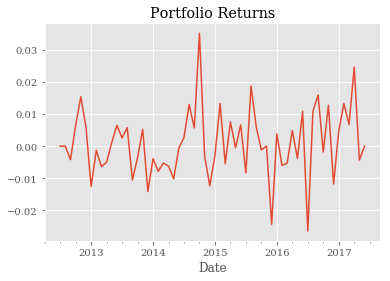

In [27]:
expected_portfolio_returns = portfolio_returns(df_long, df_short, lookahead_returns, 2*top_bottom_n)
expected_portfolio_returns.sum(axis = 1).plot(title = 'Portfolio Returns')

## Statistical Tests
### Annualized Rate of Return

In [28]:
expected_portfolio_returns_by_date = expected_portfolio_returns.T.sum().dropna()
portfolio_ret_mean = expected_portfolio_returns_by_date.mean()
portfolio_ret_ste = expected_portfolio_returns_by_date.sem()
portfolio_ret_annual_rate = (np.exp(portfolio_ret_mean * 12) - 1) * 100

print("""
Mean:                       {:.6f}
Standard Error:             {:.6f}
Annualized Rate of Return:  {:.2f}%
""".format(portfolio_ret_mean, portfolio_ret_ste, portfolio_ret_annual_rate))


Mean:                       0.000952
Standard Error:             0.001372
Annualized Rate of Return:  1.15%



The annualized rate of return allows you to compare the rate of return from this strategy to other quoted rates of return, which are usually quoted on an annual basis. 

### T-Test
Our null hypothesis ($H_0$) is that the actual mean return from the signal is zero. We'll perform a one-sample, one-sided t-test on the observed mean return, to see if we can reject $H_0$.

We'll need to first compute the t-statistic, and then find its corresponding p-value. The p-value will indicate the probability of observing a mean return equally or more extreme than the one we observed if the null hypothesis were true. A small p-value means that the chance of observing the mean we observed under the null hypothesis is small, and thus casts doubt on the null hypothesis. It's good practice to set a desired level of significance or alpha ($\alpha$) _before_ computing the p-value, and then reject the null hypothesis if $p < \alpha$.

For this project, we'll use $\alpha = 0.05$, since it's a common value to use.

Implement the `analyze_alpha` function to perform a t-test on the sample of portfolio returns. We've imported the `scipy.stats` module for you to perform the t-test.

Note: [`scipy.stats.ttest_1samp`](https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.stats.ttest_1samp.html) performs a two-sided test, so divide the p-value by 2 to get 1-sided p-value

In [29]:
from scipy import stats

def analyze_alpha(expected_portfolio_returns_by_date):
    """
    Perform a t-test with the null hypothesis being that the expected mean return is zero.
    
    Parameters
    ----------
    expected_portfolio_returns_by_date : Pandas Series
        Expected portfolio returns for each date
    
    Returns
    -------
    t_value
        T-statistic from t-test
    p_value
        Corresponding p-value
    """
    # TODO: Implement Function
    null = 0
    
    t_value, p_value_twotail = stats.ttest_1samp(expected_portfolio_returns_by_date, null)
    p_value = p_value_twotail / 2
    return t_value, p_value

In [30]:
t_value, p_value = analyze_alpha(expected_portfolio_returns_by_date)
print("""
Alpha analysis:
 t-value:        {:.3f}
 p-value:        {:.6f}
""".format(t_value, p_value))


Alpha analysis:
 t-value:        0.694
 p-value:        0.245207



### Question: What p-value did you observe? And what does that indicate about your signal?

$p-value = 0.245$, which indicates that the momentum staretegy we're using is not significant when using significance level of $\alpha = 0.05$.